<a href="https://colab.research.google.com/github/gregumo1987/MLA_GGM/blob/main/MLA4_GGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 4**  
## **Greg Gutierrez**
## **CS430**
## **Machine Learning in the Cloud** 
---

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for Decision Trees

In [3]:
# Import models.
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn import set_config
set_config(display='diagram')

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

The function below plots a straight line on a plot.

In [8]:
def abline(slope, intercept, color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

## Problem 1: Decision Tree Classification

### Reading the Data

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Splitting Data into Train/Test

In [10]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']
#Split the data into Train/Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [11]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree_classifierd', tree.DecisionTreeClassifier())
]) 
pipeline        

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree_classifierd', DecisionTreeClassifier())])

### Executing the Model

In [12]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree_classifierd', DecisionTreeClassifier())])

### Evaluating Model

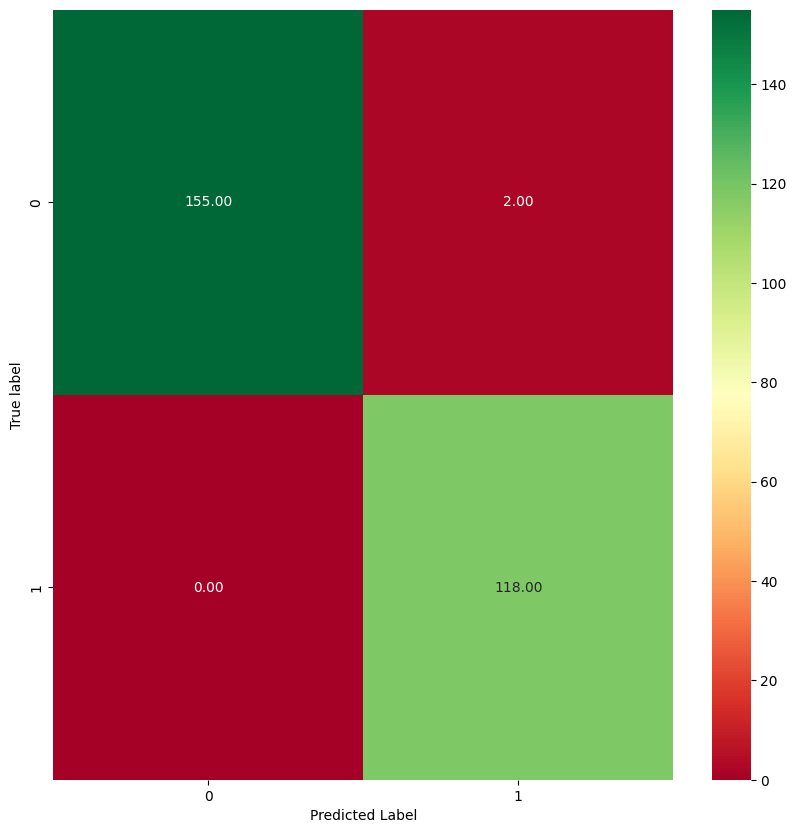

In [13]:
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Call the plot_cm function to generate the confusion matrix.
plot_cm(y_test, y_pred)

In [14]:
# Calculate the precision, recall, and F1 score. 
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision: 0.9833333333333333
Recall: 1.0
F1 score: 0.9915966386554621


### Interpreting the results:
The confusion matrix shows that the model correctly detected 118 of 118 forgeries in the test data for a recall (sensitivity) of 100%. There were only 2 false postives for a precision of 118/(118 + 2) = 98.33%. The F1 score is also quite high for this model at 99.16%, and this would be expected given the high recall and precision. 
<br><br>
With all models we need to consider the possibility of overfitting. The following analysis was taken from [https://machinelearningmastery.com/overfitting-machine-learning-models/](https://machinelearningmastery.com/overfitting-machine-learning-models/). In this analysis, accuracy score is plotted against max_depth over a range of max_depth values. Given that accuracies of predictions based on the test data follow very closely the accuracies of predictions based on the training datas, overfitting does not appear to be an issue, but it is apparent that performance plateaus at max_depth of 7, so from the standpoint of efficiency, the max_depth should be set at 7 or possibly 8 to provide a margin of safety.

>1, train: 0.858, test: 0.833
>2, train: 0.917, test: 0.909
>3, train: 0.941, test: 0.924
>4, train: 0.964, test: 0.935
>5, train: 0.986, test: 0.971
>6, train: 0.997, test: 0.985
>7, train: 1.000, test: 0.993
>8, train: 1.000, test: 0.993
>9, train: 1.000, test: 0.993
>10, train: 1.000, test: 0.993
>11, train: 1.000, test: 0.993
>12, train: 1.000, test: 0.993
>13, train: 1.000, test: 0.993
>14, train: 1.000, test: 0.993
>15, train: 1.000, test: 0.993
>16, train: 1.000, test: 0.993
>17, train: 1.000, test: 0.993
>18, train: 1.000, test: 0.993
>19, train: 1.000, test: 0.993
>20, train: 1.000, test: 0.993



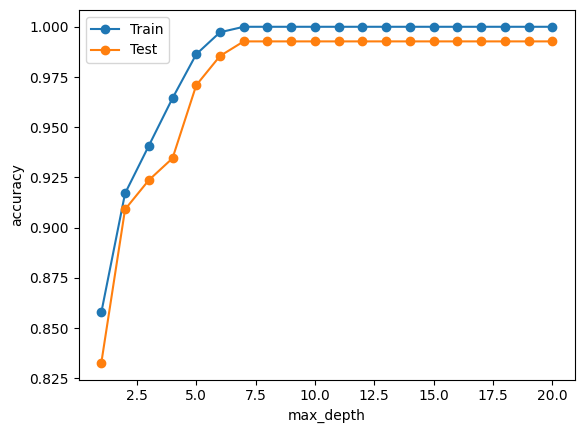

In [15]:
from sklearn.metrics import accuracy_score
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = tree.DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
print()
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

### Conclusion
This decision tree classifier produced an excellent model for predicting forgeries from the scaled numeric variables, `variance`, `curtosis`, `skewness`, and `entropy`. Therefore, it should be quite suitable for that purpose. This model was 100% sensitive for detecting forgeries and its precision was 98.33%. It is interesting to note that this model performed slighly better than the model obtained with a support vector machine (MLA3_LHS) in that there were only two instead of 4 false positives, giving a slightly higher precision. With such excellent performance statistics there is always concern regarding overfitting, but plotting analysis vs. max_depth was not suggestive of overfitting with this model. 

## Problem 2: Decision Tree Regression

### Reading the Data

In [16]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [17]:
# Rename the columns.
df.rename(columns = {'Usage_kWh':'usage_kwh'},inplace=True)
df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'},inplace=True)
df.rename(columns = {'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'},inplace=True)
df.rename(columns = {'Lagging_Current_Power_Factor':'lag_current_pwr'},inplace=True)
df.rename(columns = {'Leading_Current_Power_Factor':'lead_current_pwr'},inplace=True)
df.rename(columns = {'NSM':'nsm'},inplace=True)
df.rename(columns = {'WeekStatus':'week_status'},inplace=True)
df.rename(columns = {'Day_of_week':'day_of_week'},inplace=True)
df.rename(columns = {'Load_Type':'load_type'},inplace=True)

### Splitting Data into Train/Test

In [18]:
X = df.loc[:,'lag_react_pwr_kvarh':'load_type']
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [19]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']
col_transform = ColumnTransformer(transformers=[
                 ('cat', OneHotEncoder(), cat_attribs),
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree_regression', tree.DecisionTreeRegressor(max_depth=None, random_state=0))
]) 
from sklearn import set_config
set_config(display='diagram')
pipeline      

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree_regression',
                 DecisionTreeRegressor(random_state=0))])

### Executing the Model

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree_regression',
                 DecisionTreeRegressor(random_state=0))])

### Evaluating Model

Compute RMSE's for training and test data.

In [21]:
# Make predictions on the training data.
y_train_pred = pipeline.predict(X_train)
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Get the root mean square errors for both 
RMSE_train = (mean_squared_error(y_train, y_train_pred))**.5
RMSE_test = (mean_squared_error(y_test, y_pred))**.5
print('RMSE_train =',RMSE_train,'  RMSE_test =',RMSE_test)

RMSE_train = 2.522734059135841e-16   RMSE_test = 1.250724196608403


Plot predicted vs. actual.

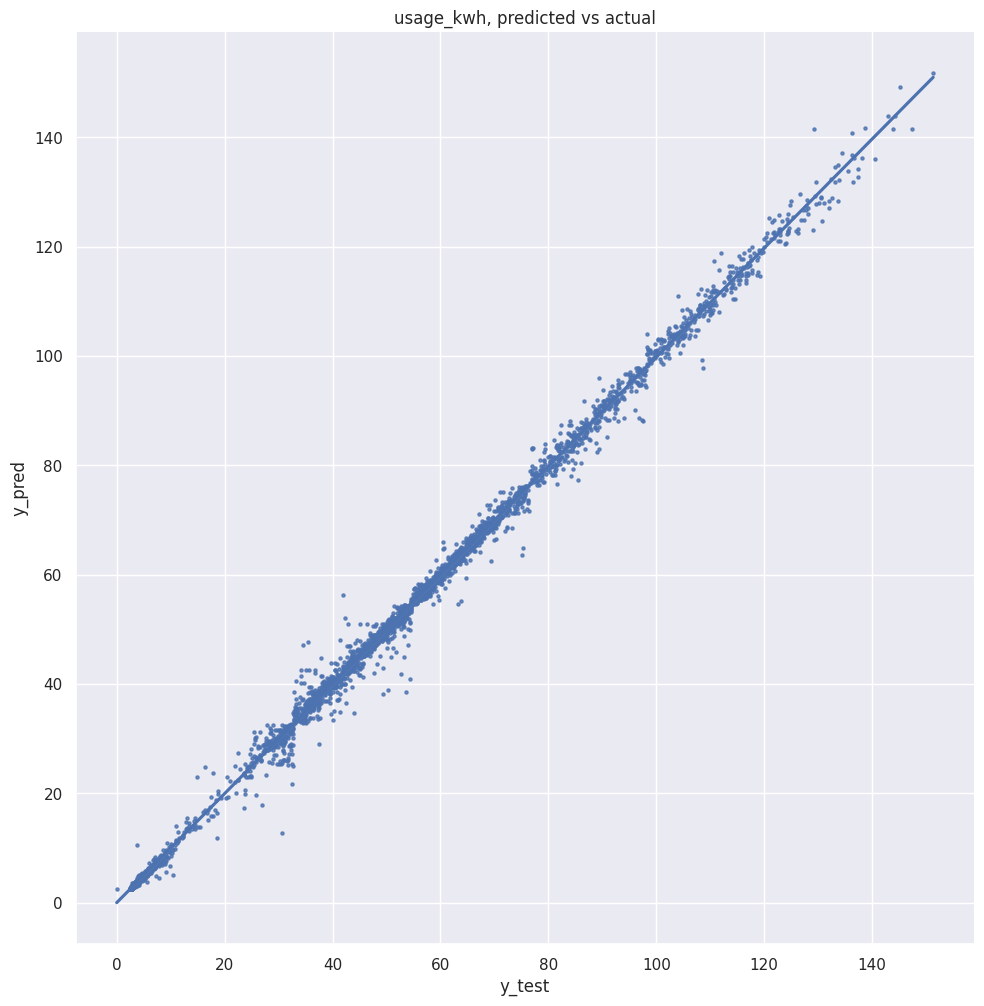

In [22]:
# Plot predicted vs actual
data = {'y_test': y_test, 'y_pred': y_pred}
df2 = pd.DataFrame(data)
sns.set(rc = {'figure.figsize':(50,50)})
sns.lmplot(x='y_test', y='y_pred', data=df2, height=10, aspect=1, scatter_kws={"s": 5}).set(title='usage_kwh, predicted vs actual')
plt.show()

Plot RMSE for training data and test data against a range of max_depth values.

>1, train: 15.750, test: 15.721
>2, train: 8.344, test: 8.607
>3, train: 4.617, test: 4.534
>4, train: 3.841, test: 3.814
>5, train: 3.542, test: 3.580
>6, train: 3.248, test: 3.359
>7, train: 2.908, test: 3.085
>8, train: 2.615, test: 2.844
>9, train: 2.267, test: 2.557
>10, train: 1.967, test: 2.338
>11, train: 1.663, test: 2.053
>12, train: 1.384, test: 1.823
>13, train: 1.138, test: 1.679
>14, train: 0.943, test: 1.561
>15, train: 0.761, test: 1.478
>16, train: 0.610, test: 1.356
>17, train: 0.455, test: 1.326
>18, train: 0.335, test: 1.294
>19, train: 0.234, test: 1.257
>20, train: 0.159, test: 1.413
>21, train: 0.105, test: 1.307
>22, train: 0.065, test: 1.249
>23, train: 0.042, test: 1.275
>24, train: 0.026, test: 1.273
>25, train: 0.016, test: 1.353
>26, train: 0.010, test: 1.266
>27, train: 0.006, test: 1.277
>28, train: 0.002, test: 1.367
>29, train: 0.001, test: 1.258
>30, train: 0.000, test: 1.292



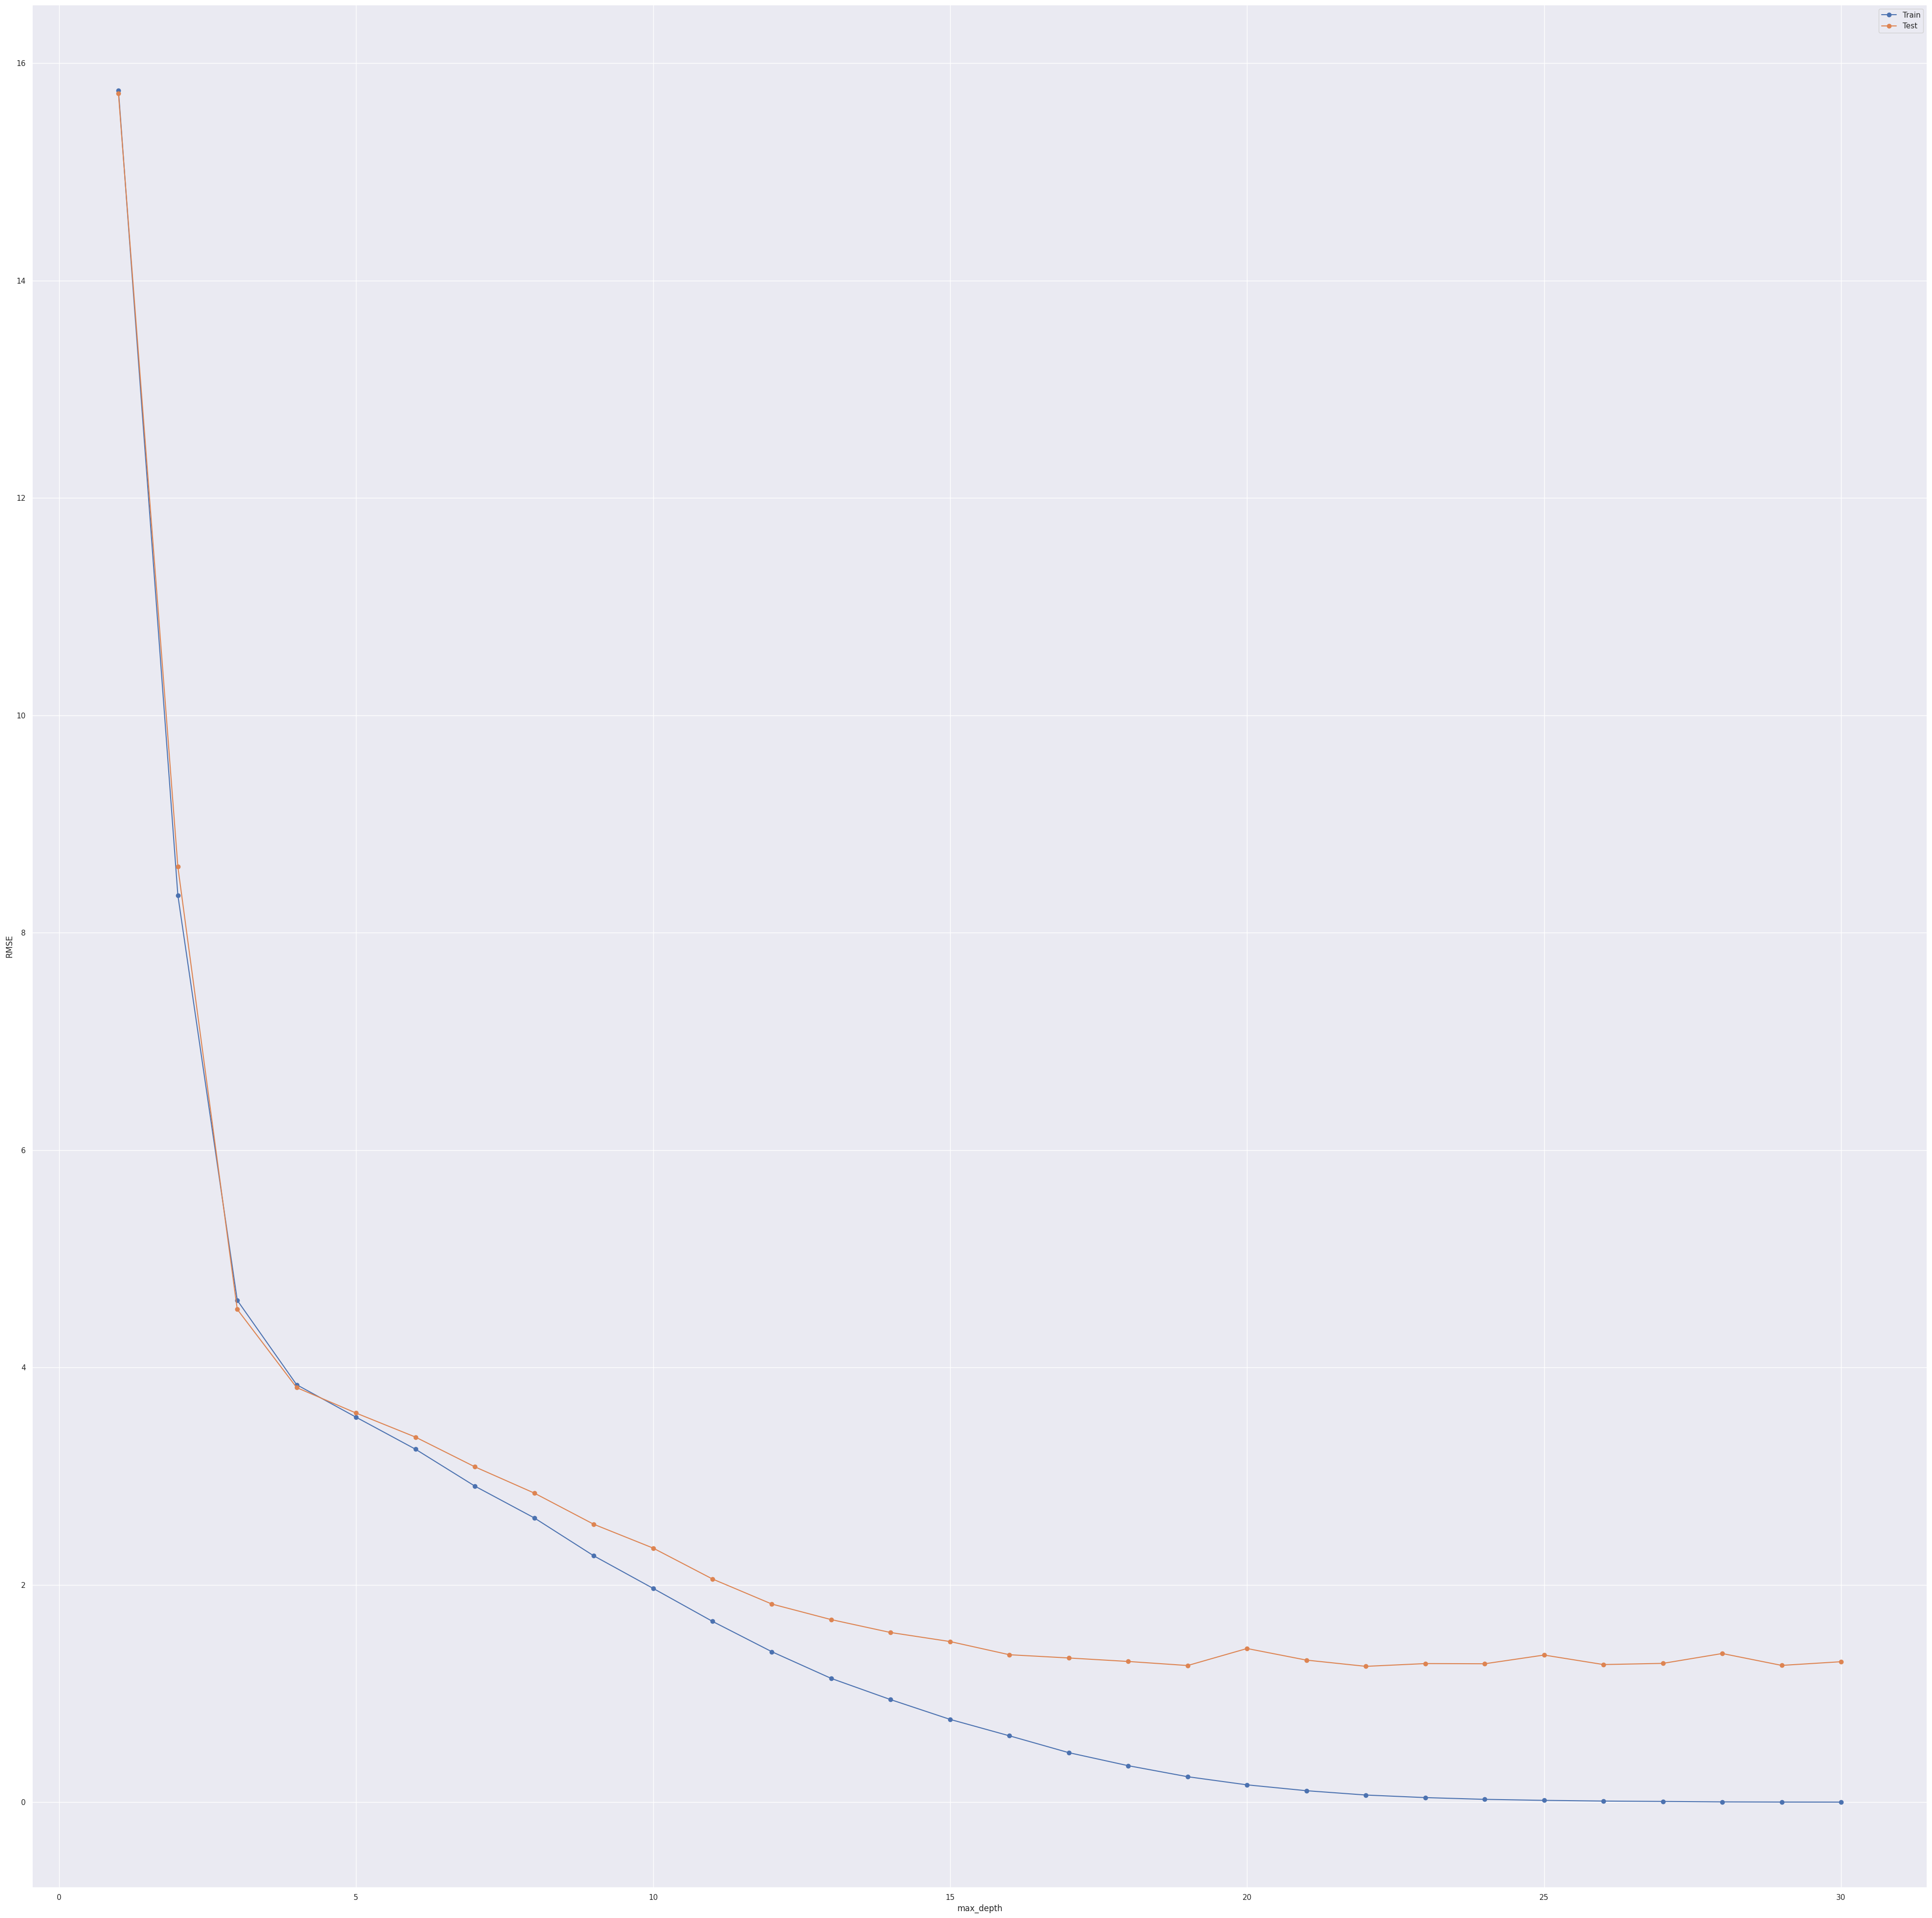

In [23]:
# define lists to collect scores
train_scores_reg, test_scores_reg = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 31)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	# model = tree.DecisionTreeRegressor(max_depth=i)
  col_transform_reg = ColumnTransformer(transformers=[
                 ('cat', OneHotEncoder(), cat_attribs),
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
  pipeline_reg = Pipeline([('transform', col_transform_reg),('dt_regression', tree.DecisionTreeRegressor(max_depth=i, random_state=0))]) 
	# fit model on the training dataset
  pipeline_reg.fit(X_train, y_train)
	# evaluate on the train dataset
  train_yhat = pipeline_reg.predict(X_train)
  train_RMSE = (mean_squared_error(y_train, train_yhat))**.5
  train_scores_reg.append(train_RMSE)
	# evaluate on the test dataset
  test_yhat = pipeline_reg.predict(X_test)
  test_RMSE = (mean_squared_error(y_test, test_yhat))**.5
  test_scores_reg.append(test_RMSE)
	# summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_RMSE, test_RMSE))
print()
# plot of train and test scores vs tree depth
plt.plot(values, train_scores_reg, '-o', label='Train')
plt.plot(values, test_scores_reg, '-o', label='Test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.rcParams["figure.figsize"] = (12, 9)
plt.show()

### Interpreting the results:
The RMSE values obtained here with decision tree regression are excellent and better than those that were obtained with both linear regression and suport vector regression in previous assignments. In addition, the plot of actual vs. predicted values for this model has a much improved appearance compared with similar plots using linear regression and support vector regression. Notably, decision tree regresson does not produce the marked segmentation that was seen with the other models and the data points appear to randomly distributed about the identity line with fewer outliers.<br><br>
**There is an as yet unresolved inconsistency in the computed RMSE values.** When computed the first time, with max_depth set to 'None', the RMSE for the training data is reported to be 2.52 and the RMSE for the test data is reported to be 1.25. However, when training RMSE is computed for a range of max_depth values the results are very different with training RMSE's approaching zero. As stated, this inconsistency is as yet unexplained. Intuitively, the plot of RMSE vs. max_depth is what would be expected and based on this, some degree of overfitting is implied at max_depths above 10 to 15. It would seem prudent then to limit max_depth to no more than 15, both for computational efficiency and to decrease the potential for overfitting.

### Conclusion
The performance of this decision tree regression model is quite good and as such it is definitely suitable for predicting kwh usage based on the numerical and categorical parameters specified. This model performs better than the linear regression and support vector models that were developed in previous assignments, although both these models also performed well. Max_depth for this decision tree model should be limited to no more than 15 for computational efficiency and to decrease the potential for overfitting.<br><br>
As stated above, this report contains an unresolved inconsistency in RMSE's calculated on the training data. This inconsistency was not seen in the RMSE's calculated on the test data.